# Simple Linear Regression | Placement Model Selection | part 2

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-lr-data/placement (3).csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('/kaggle/input/simple-lr-data/placement (3).csv')

df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Package (in lpa)')

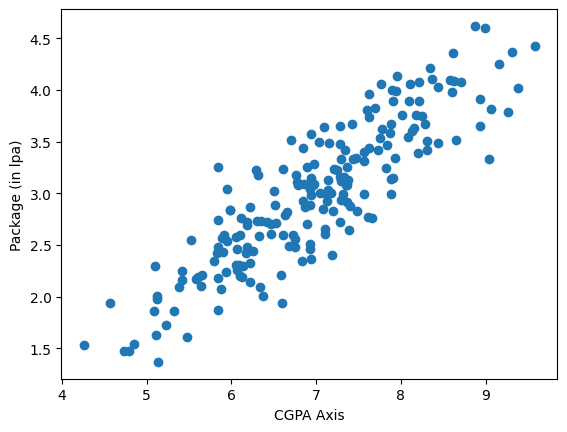

In [6]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA Axis')
plt.ylabel('Package (in lpa)')

In [7]:
X= df.iloc[:, 0:1]
y= df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [9]:
X_train.shape

(160, 1)

In [10]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred= lr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.780730147510384

In [13]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [14]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [15]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([3.09324469])

Text(0, 0.5, 'Package(in lpa)')

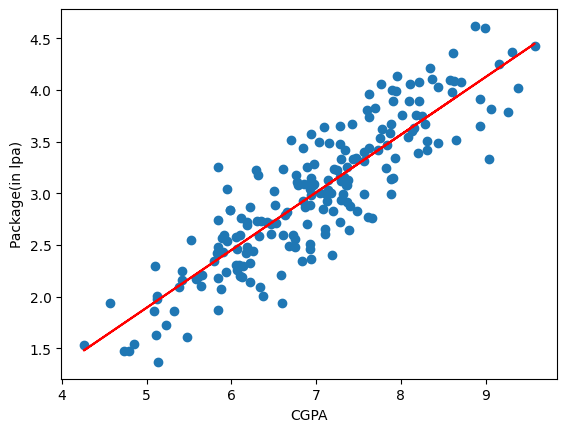

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

Text(0, 0.5, 'Package(in lpa)')

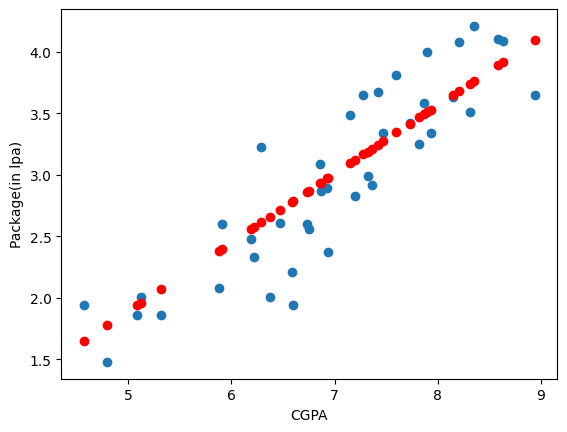

In [17]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [18]:
m= lr.coef_
print(m)

[0.55795197]


In [19]:
b= lr.intercept_
print(b)

-0.8961119222429144


In [20]:
#y= mx+b

m * 9.5 + b

array([4.40443183])

In [21]:
m * 100 + b

array([54.89908542])

In [22]:
m * 8.58 + b

array([3.89111601])